# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [27]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.92980163 2.872271   2.26326685 2.92527959 2.86380968 2.94095382
 2.37175794 2.41968496 2.69276987 2.02535625]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [28]:
# your code here
def random(bottom, ceiling, count):
    x = uniform.rvs(size=count) #create random numbers and the number will be define by count
    return bottom + (ceiling-bottom)*x # randoms  = a + (b-a)*x


In [29]:
random1 = random(10,15,100)
random2= random(10,60,1000)

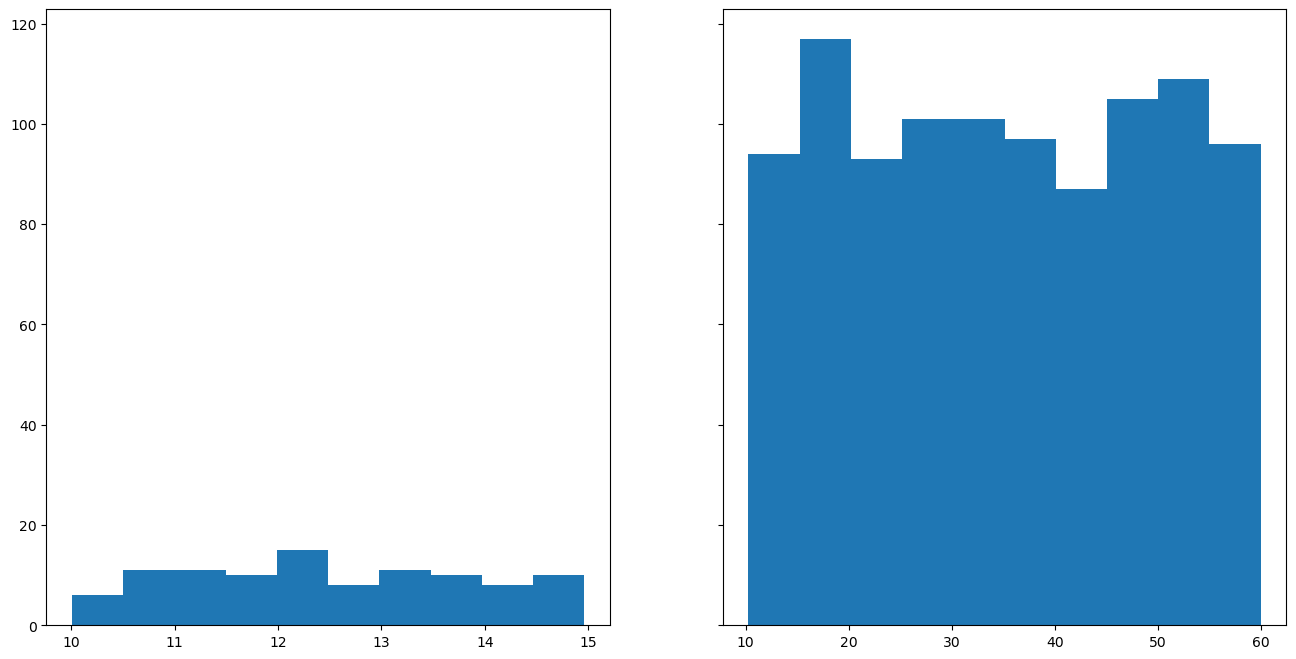

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots (nrows=1, ncols=2, figsize=(16,8), sharey=True) #sharey=True -> indicates that the y-axes of the subplots will share the same range, in this case count.
ax[0].hist(random1, bins=10)
ax[1].hist(random2, bins=10)
plt.show()

How are the two distributions different?

In [31]:
# your answer here:
""" Both histograms use 10 bins, dividing the x-axis into intervals. The first histogram show an even distribution of counts between 10 to 15, 
with 100 values spread across the bins. The second histogram will also display an even count distribution, but with a range (10 to 60) 
and more values (1,000), leading to a wider distribution across bins. 
The two distributions differ mainly in their ranges and the number of values."""

' Both histograms use 10 bins, dividing the x-axis into intervals. The first histogram show an even distribution of counts between 10 to 15, \nwith 100 values spread across the bins. The second histogram will also display an even count distribution, but with a range (10 to 60) \nand more values (1,000), leading to a wider distribution across bins. \nThe two distributions differ mainly in their ranges and the number of values.'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [32]:
# your code here
import numpy as np

def random_normal(mean, std, size):
    return np.random.normal(loc=mean, scale=std, size=size)

random_n1 = random_normal(10,1,1000)
random_n2 = random_normal(10,50,1000)

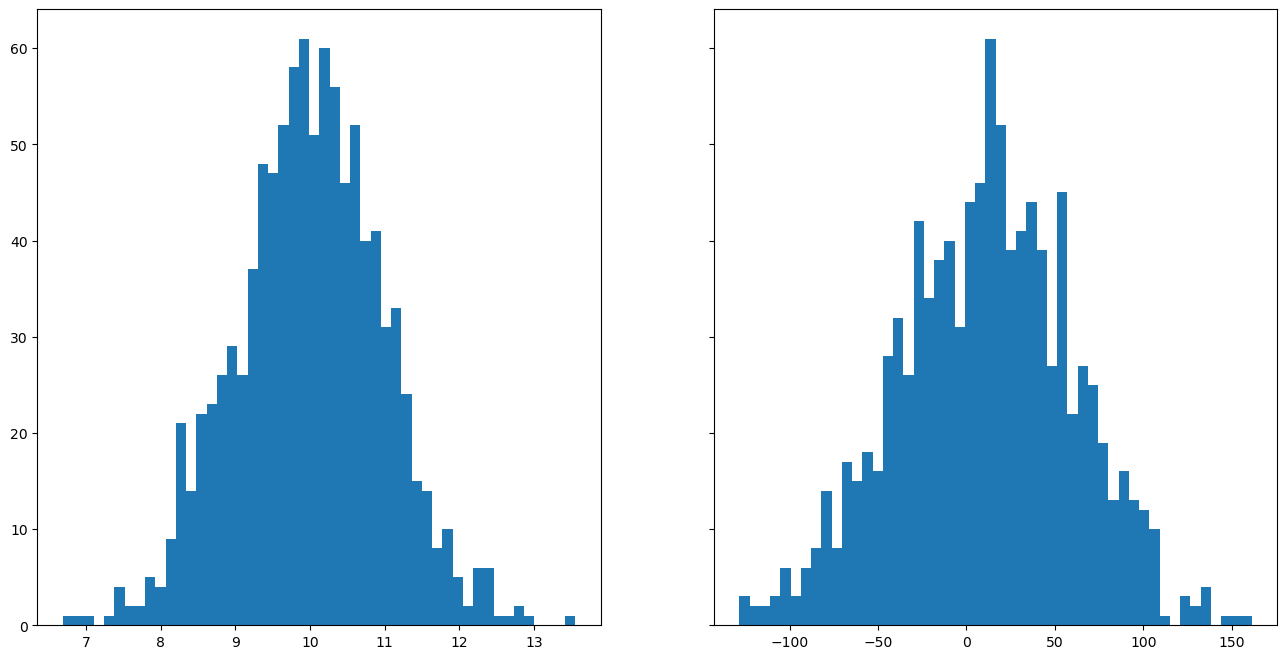

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)

ax[0].hist(random_n1, bins=50)
ax[1].hist(random_n2, bins=50)
plt.show()

How are the two distributions different?

In [34]:
# your answer here:
""" the second distribution has a much larger dispersion of data points due to its higher standard deviation, 
leading to a broader and more spread-out histogram compared to the first distribution."""

' the second distribution has a much larger dispersion of data points due to its higher standard deviation, \nleading to a broader and more spread-out histogram compared to the first distribution.'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [35]:
# your code here
import pandas as pd
df= pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


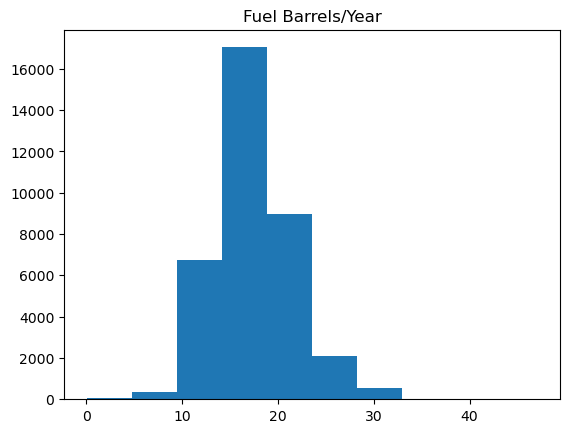

In [26]:
# your code here
plt.hist(df['Fuel Barrels/Year'])
plt.title('Fuel Barrels/Year')
plt.show()

2. CO2 Emission Grams/Mile 

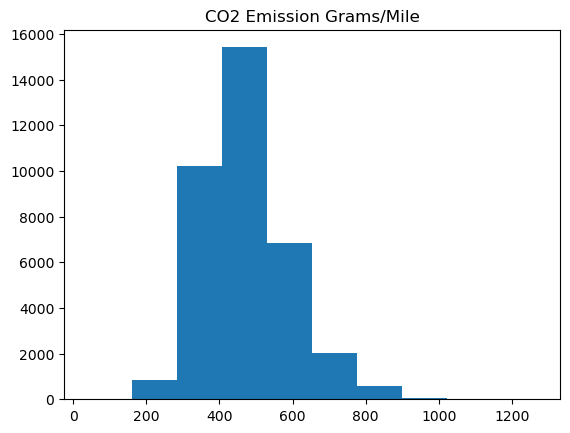

In [37]:
plt.hist(df['CO2 Emission Grams/Mile'])
plt.title('CO2 Emission Grams/Mile')
plt.show()

3. Combined MPG

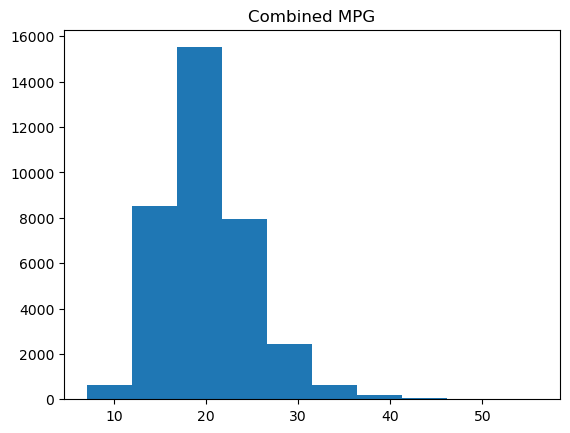

In [43]:
# your code here
plt.hist(df['Combined MPG'])
plt.title('Combined MPG')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

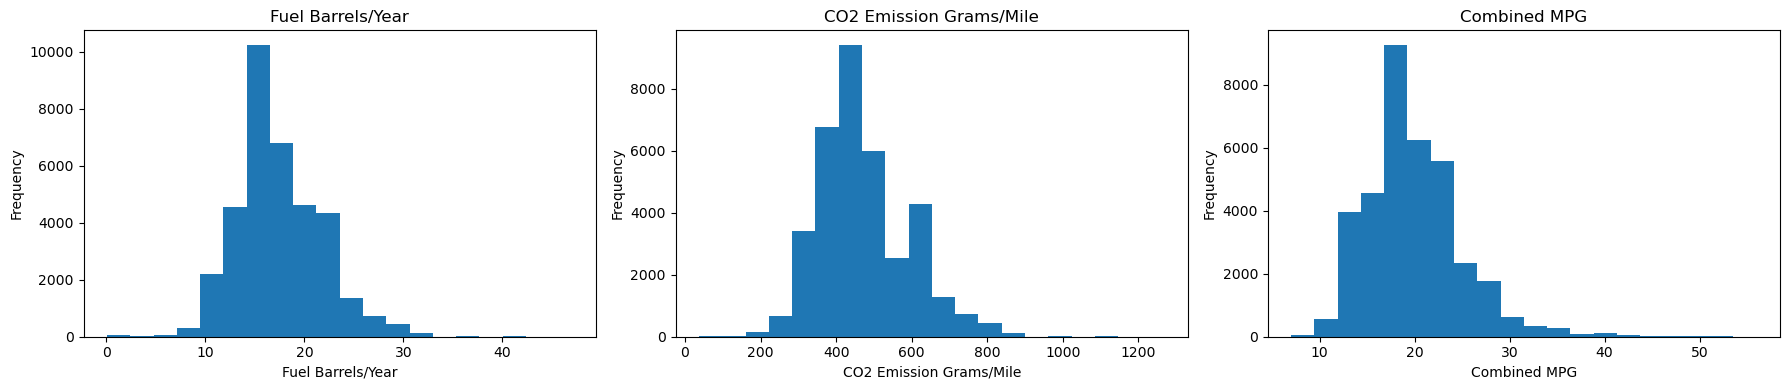

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].hist(df['Fuel Barrels/Year'], bins=20)
axs[0].set_title('Fuel Barrels/Year')
axs[0].set_xlabel('Fuel Barrels/Year')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['CO2 Emission Grams/Mile'], bins=20)
axs[1].set_title('CO2 Emission Grams/Mile')
axs[1].set_xlabel('CO2 Emission Grams/Mile')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['Combined MPG'], bins=20)
axs[2].set_title('Combined MPG')
axs[2].set_xlabel('Combined MPG')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# you answer here:
 """A histogram of a normally distributed variable typically exhibits a bell-shaped curve. """


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [57]:
# your code here
def random_exp(scale, size):
    return np.random.exponential(scale=scale, size=size)

expon1 = random_exp(1,1000)
expon2 = random_exp(100,1000)

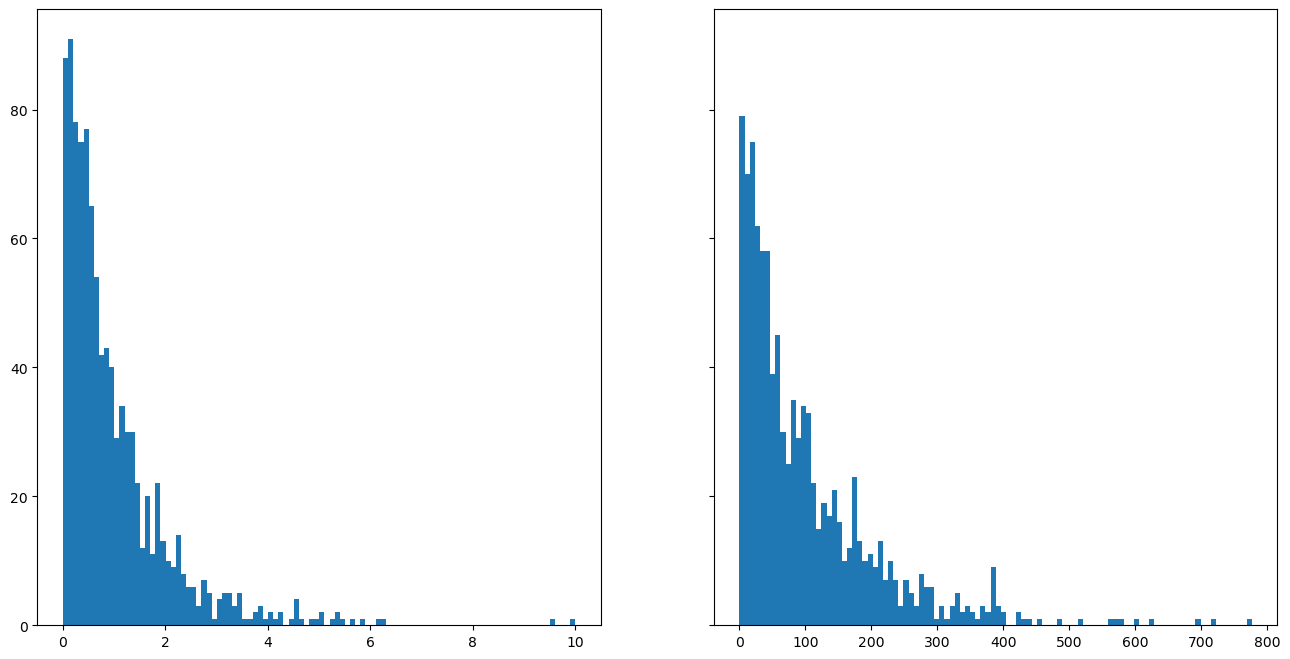

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), sharey=True)

ax[0].hist(expon1, bins=100)
ax[1].hist(expon2, bins=100)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
# The main difference between these teo distribuitions is the mean parameter (in the first 1 the mean is 1 and in the second one the mean is 100). This difference in means leads to the distinct shapes and spreads observed in the histograms.


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [64]:
# your answer here
# Hint: This is same as saying P(x<15)
from scipy.stats import expon

What is the probability that the customer will spend more than 15 minutes

In [65]:
# your answer here
lambda_inv = 10
exp_d = expon(scale=lambda_inv)  
exp_d.cdf(15)
probability_more_than_15 = 1 - exp_d.cdf(15) 
print("The probability that the customer will spend more than 15 minutes", probability_more_than_15)

The probability that the customer will spend more than 15 minutes 0.2231301601484298
